---
title:  "TIS 200521"
excerpt:  "변수의 종류"

categories:
  - TIS
tags:
  - 기초
  - 통계
  
toc: true
toc_sticky: true
---

## Today I Studied 2020.05.21

### 변수의 종류

![Data-type](https://user-images.githubusercontent.com/59638493/82888203-0107a880-9f84-11ea-8d3d-cbb762089e14.png)

데이터는 크게 정형과 비정형 데이터로 나뉩니다. 

정형 데이터는 (특정 규칙에 의해) 숫자로 표기 가능한 데이터를 의미합니다. 

비정형 데이터는 흔히 텍스트, 이미지, 영상, 음악 등으로 이루어진 데이터를 말합니다. 

먼저 기초적으로 정형 데이터를 이해해야 합니다. 

정형 데이터는 다시 수량적 특성에 의해 다음과 같이 분류될 수 있습니다.

* 질적qualitative 데이터 
    - 서열ordered
    - 비서열non-ordered

* 양적quantitative 데이터 
    - 연속형continuous
    - 비연속형non-continuous

또는 자료의 특성에 따라 다음과 같이 분류할 수 있습니다.

* 범주형categorical 데이터
    - 순위ordinal
    - 명목nominal

* 연속형continuous 데이터
    - 간격interval : 절대 0 존재 안함 (0이어도 의미 있음)
    - 비율ratio : 절대 0 존재 (0이면 의미 없음)

#### titanic features 
* categorical : 'Sex', 'Embarked'
* ordinal : 'Pclass'
* continuous : 'Age'
* discrete : 'SibSp', 'Parch'

In [1]:
# library load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set()

In [2]:
# data load
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


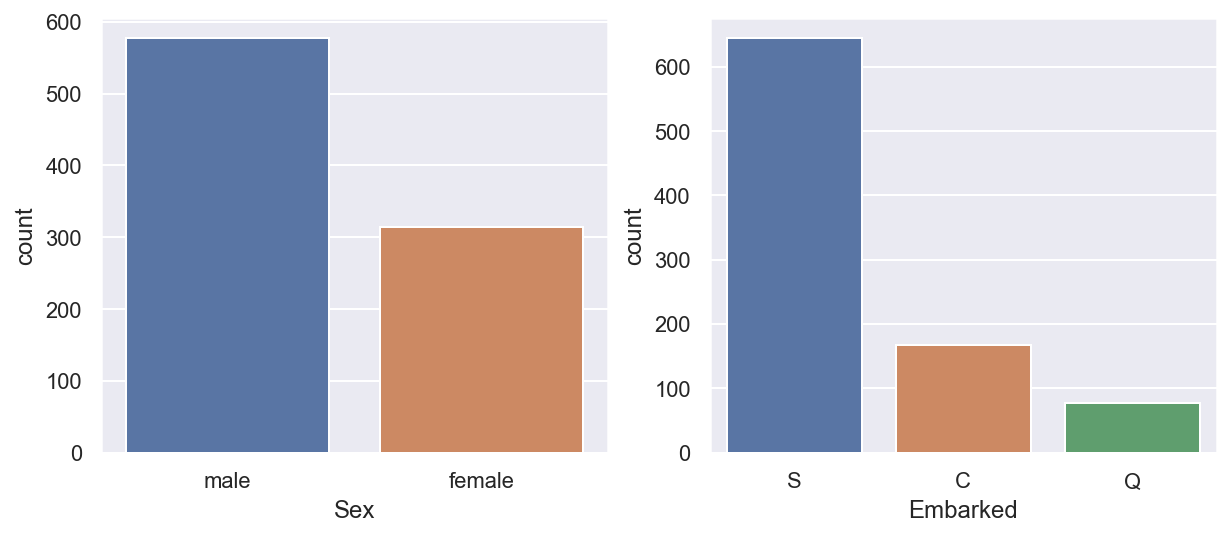

In [14]:
# categorical 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.countplot(train.Sex, ax=axes[0])
sns.countplot(train.Embarked, ax=axes[1])

In [38]:
print(train['Sex'].astype('category').cat.codes.head())

print(train['Embarked'].astype('category').cat.codes.tail())

0    1
1    0
2    0
3    0
4    1
dtype: int8
886    2
887    2
888    2
889    0
890    1
dtype: int8


성별은 두개(0, 1)의 레벨로, 배에 오른 항구는 3개(0, 1, 2)의 레벨로 나눠서 인코딩할 수 있습니다. 

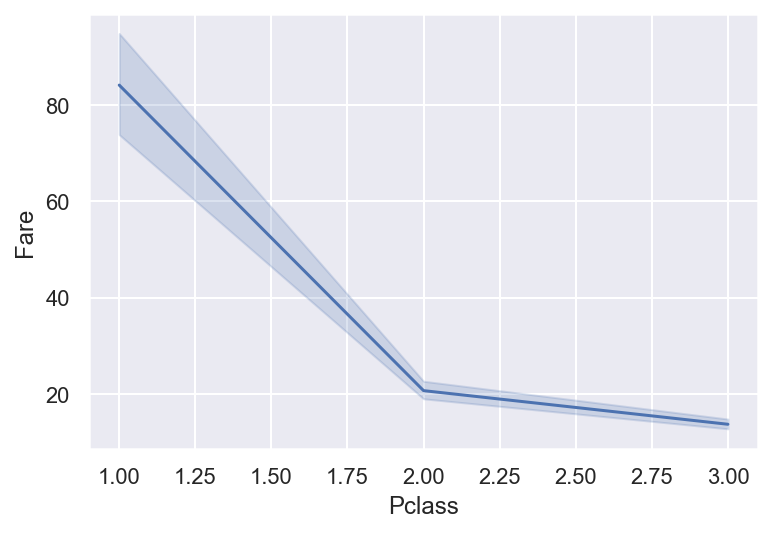

In [20]:
# ordinal
sns.lineplot(data=train, x='Pclass', y='Fare')

In [56]:
# train['Pclass'].astype('category').describe()
# pd.factorize(train['Pclass'], sort=True)
mapper = {1:'1st', 2:'2nd', 3:'3rd'}
preserve_mapper = {'1st':0, '2nd':1, '3rd':2}
pclass = train.Pclass

p = pclass.replace(mapper)
print(p)
p.replace(preserve_mapper)

0      3rd
1      1st
2      3rd
3      1st
4      3rd
      ... 
886    2nd
887    1st
888    3rd
889    1st
890    3rd
Name: Pclass, Length: 891, dtype: object


0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: Pclass, Length: 891, dtype: int64

순위 척도는 명목 처럼 `.astype('category')` 해줄 경우 순위라는 의미가 퇴색되고,<br>
등간 처럼 사용할 경우 범주형이 가진 의미 자체가 오용될 수 있습니다. 

따라서, `dict`를 활용해 순위 척도의 의미를 보존하는 것이 안전합니다. 

* 참고 : https://stackoverflow.com/questions/29528628/how-to-specify-a-variable-in-pandas-as-ordinal-categorical

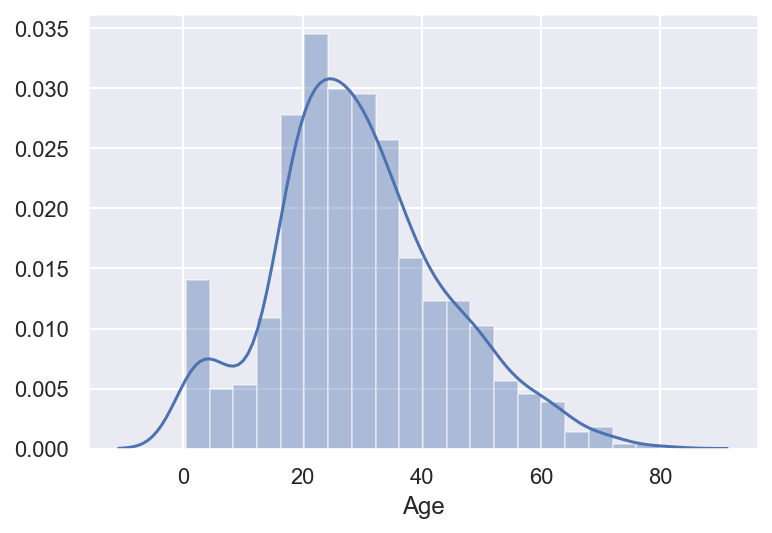

In [21]:
# continuous
sns.distplot(train.Age)

연속형 변수는 `binning` 을 통해 범주화가 가능합니다.<br>
*단, 범주형 변수을 연속형 변수로 변형시키는 것은 불가능합니다.*

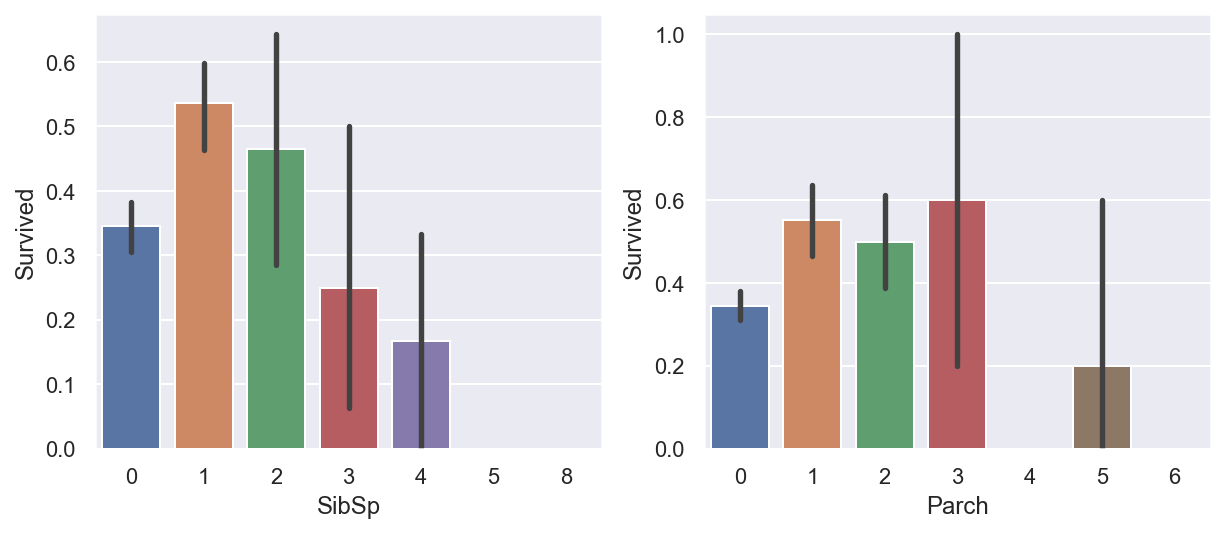

In [24]:
# discrete
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(data=train, x='SibSp', y='Survived', ax=axes[0])
sns.barplot(data=train, x='Parch', y='Survived', ax=axes[1])

`train.SibSp == 0`과 `train.Parch == 0` 은 절대 영점으로,<br>
'형제 / 배우자' 나 '부모 / 자녀' 와 동승하지 않음을 의미합니다. 